In [1]:
import os 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import matplotlib.pyplot as plt 
import numpy as np  
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
from keras import layers
import sklearn
from sklearn.utils import shuffle
from matplotlib.font_manager import FontProperties
from matplotlib import colors
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.default"] = "rm"
#plt.rcParams['text.usetex'] = True
from matplotlib.colors import LogNorm
#plt.style.use('seaborn')
from tqdm import tqdm 
import warnings
warnings.filterwarnings("ignore")

In [2]:
dir_ = '/Users/hammad/work/tth/data/new/'

H1 = pd.concat([pd.read_csv(dir_+'alpha-0.000000_HighLevel.csv').iloc[:,1:],pd.read_csv(dir_+'alpha-0.000000_LowLevel.csv').iloc[:,1:],pd.read_csv(dir_+'alpha-0.000000_Polarization.csv').iloc[:,1:]],axis=1)
H2 = pd.concat([pd.read_csv(dir_+'alpha-0.261766_HighLevel.csv').iloc[:,1:],pd.read_csv(dir_+'alpha-0.261766_LowLevel.csv').iloc[:,1:],pd.read_csv(dir_+'alpha-0.261766_Polarization.csv').iloc[:,1:]],axis=1)
H3 = pd.concat([pd.read_csv(dir_+'alpha-0.523599_HighLevel.csv').iloc[:,1:],pd.read_csv(dir_+'alpha-0.523599_LowLevel.csv').iloc[:,1:],pd.read_csv(dir_+'alpha-0.523599_Polarization.csv').iloc[:,1:]],axis=1)      
H4 = pd.concat([pd.read_csv(dir_+'alpha-0.785398_HighLevel.csv').iloc[:,1:],pd.read_csv(dir_+'alpha-0.785398_LowLevel.csv').iloc[:,1:],pd.read_csv(dir_+'alpha-0.785398_Polarization.csv').iloc[:,1:]],axis=1)      
H5 = pd.concat([pd.read_csv(dir_+'alpha-1.047200_HighLevel.csv').iloc[:,1:],pd.read_csv(dir_+'alpha-1.047200_LowLevel.csv').iloc[:,1:],pd.read_csv(dir_+'alpha-1.047200_Polarization.csv').iloc[:,1:]],axis=1)      
H6 = pd.concat([pd.read_csv(dir_+'alpha-1.309000_HighLevel.csv').iloc[:,1:],pd.read_csv(dir_+'alpha-1.309000_LowLevel.csv').iloc[:,1:],pd.read_csv(dir_+'alpha-1.309000_Polarization.csv').iloc[:,1:]],axis=1)      
H7 = pd.concat([pd.read_csv(dir_+'alpha-1.570800_HighLevel.csv').iloc[:,1:],pd.read_csv(dir_+'alpha-1.570800_LowLevel.csv').iloc[:,1:],pd.read_csv(dir_+'alpha-1.570800_Polarization.csv').iloc[:,1:]],axis=1)      
qcd = pd.concat([pd.read_csv(dir_+'QCD_HighLevel.csv').iloc[:,1:],pd.read_csv(dir_+'QCD_LowLevel.csv').iloc[:,1:],pd.read_csv(dir_+'QCD_Polarization.csv').iloc[:,1:]],axis=1)


for i in qcd.columns:
    qcd.loc[qcd[i] > 4000, i] = 0.0
    H1.loc[H1[i] > 4000, i] = 0.0
    H2.loc[H2[i] > 4000, i] = 0.0
    H3.loc[H3[i] > 4000, i] = 0.0
    H4.loc[H4[i] > 4000, i] = 0.0
    H5.loc[H5[i] > 4000, i] = 0.0
    H6.loc[H6[i] > 4000, i] = 0.0
    H7.loc[H7[i] > 4000, i] = 0.0
    #print(i)



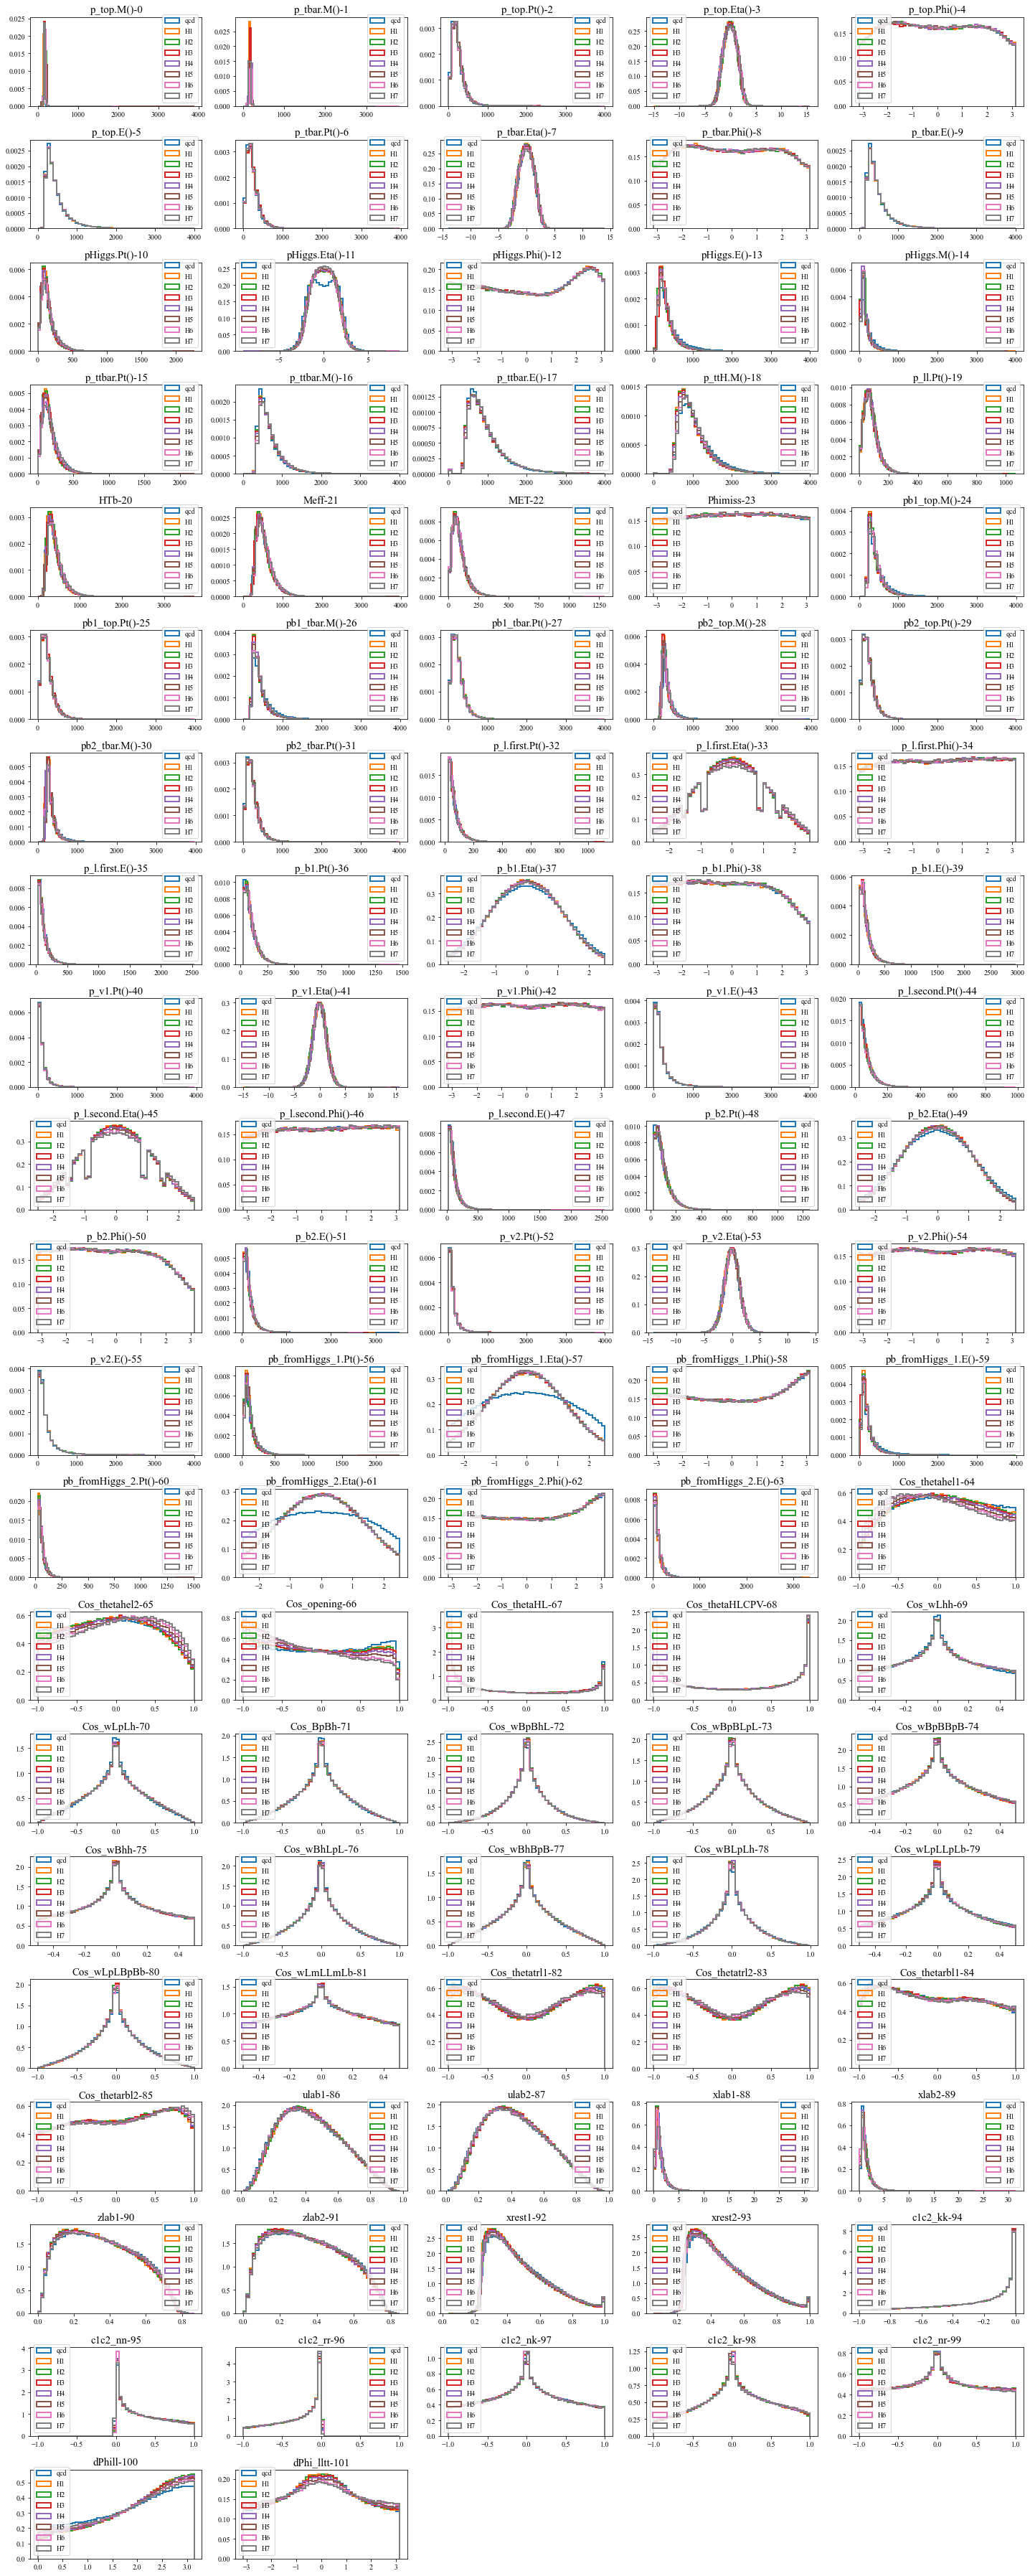

In [3]:
fig = plt.figure(figsize=(20,50))
for i in range(len(qcd.columns[:-1])):
    y = fig.add_subplot(21,5,i+1)
    y.hist(qcd[qcd.columns[i]], bins = 50, density=True, histtype='step',label = 'qcd',linewidth = 2,fill = False)
    y.hist(H1[H1.columns[i]], bins = 50, density=True, histtype='step',label = 'H1',linewidth = 2,fill = False)
    y.hist(H2[H2.columns[i]], bins = 50, density=True, histtype='step',label = 'H2',linewidth = 2,fill = False)
    y.hist(H3[H3.columns[i]], bins = 50, density=True, histtype='step',label = 'H3',linewidth = 2,fill = False)
    y.hist(H4[H4.columns[i]], bins = 50, density=True, histtype='step',label = 'H4',linewidth = 2,fill = False)
    y.hist(H5[H5.columns[i]], bins = 50, density=True, histtype='step',label = 'H5',linewidth = 2,fill = False)
    y.hist(H6[H6.columns[i]], bins = 50, density=True, histtype='step',label = 'H6',linewidth = 2,fill = False)
    y.hist(H7[H7.columns[i]], bins = 50, density=True, histtype='step',label = 'H7',linewidth = 2,fill = False)
    y.set_title(str(qcd.columns[i])+'-'+str(i),fontsize = 15)
    plt.legend()
plt.tight_layout()    
plt.savefig('distr.pdf')

In [4]:
H1['b'] = np.ones(H1.shape[0])*0.0
H2['b'] = np.ones(H2.shape[0])*0.261766
H3['b'] = np.ones(H3.shape[0])*0.52359
H4['b'] = np.ones(H4.shape[0])*0.785398
H5['b'] = np.ones(H5.shape[0])*1.047200
H6['b'] = np.ones(H6.shape[0])*1.309000
H7['b'] = np.ones(H7.shape[0])*1.570800
qcd['b'] = np.random.choice(np.random.uniform(0.0,1.57,200),qcd.shape[0]) 

qcd['label']=np.zeros(qcd.shape[0])
H1['label']=np.ones(H1.shape[0]) 
H2['label']=np.ones(H2.shape[0]) 
H3['label']=np.ones(H3.shape[0]) 
H4['label']=np.ones(H4.shape[0]) 
H5['label']=np.ones(H5.shape[0]) 
H6['label']=np.ones(H6.shape[0]) 
H7['label']=np.ones(H7.shape[0]) 

In [5]:
print(H1.shape, H2.shape, H3.shape,H4.shape,H5.shape,qcd.shape)

(433379, 105) (435434, 105) (438118, 105) (444080, 105) (453765, 105) (799460, 105)


# NOTE: here I use only 4 signal points to train the network

In [6]:


df = pd.concat([H1.iloc[:100000,:],H3.iloc[:100000,:],H4.iloc[:100000,:],H7.iloc[:100000,:],qcd.iloc[:300000,:]], ignore_index=True)    



In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],shuffle=True,test_size=0.2)


In [8]:
from sklearn.preprocessing import StandardScaler
Sc = StandardScaler()
x_train = Sc.fit_transform(x_train)
x_test = Sc.transform(x_test)

In [9]:
drop_rate = 0.25
def build_classifier():
    inputs1 = layers.Input((x_train[:,:-1].shape[1],))
    dense1 = layers.Flatten()(inputs1) 
    dense2 = layers.Dense(256,activation='relu')(dense1) 
    dense3 = layers.Dropout(drop_rate)(dense2) 
    dense4 = layers.Dense(128,activation='relu')(dense3) 
    dense5 = layers.Dropout(drop_rate)(dense4)
    dense6 = layers.Dense(64,activation='relu')(dense5) 
    inputs2 = layers.Input((1,))
    dense7 = layers.Dense(64)(inputs2)
    combined  = layers.concatenate([dense6,dense7])
    out = layers.Dense(1,activation='sigmoid')(combined)
    model = keras.Model([inputs1,inputs2],out)
    return model

In [10]:
model = build_classifier()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 103)]                0         []                            
                                                                                                  
 flatten (Flatten)           (None, 103)                  0         ['input_1[0][0]']             
                                                                                                  
 dense (Dense)               (None, 256)                  26624     ['flatten[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 256)                  0         ['dense[0][0]']               
                                                                                              

In [11]:
model.compile(optimizer=keras.optimizers.legacy.Adam(learning_rate=0.0001),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])


In [12]:
history = model.fit([x_train[:,:-1],x_train[:,-1]],y_train,epochs=5,batch_size=1024,shuffle =True, validation_split=0.2)


Epoch 1/5
438/438 [==============================] - 4s 8ms/step - loss: 0.6981 - accuracy: 0.5801 - val_loss: 0.6453 - val_accuracy: 0.6260
Epoch 2/5
438/438 [==============================] - 3s 8ms/step - loss: 0.6552 - accuracy: 0.6151 - val_loss: 0.6432 - val_accuracy: 0.6278
Epoch 3/5
438/438 [==============================] - 3s 7ms/step - loss: 0.6500 - accuracy: 0.6218 - val_loss: 0.6421 - val_accuracy: 0.6311
Epoch 4/5
438/438 [==============================] - 3s 8ms/step - loss: 0.6491 - accuracy: 0.6243 - val_loss: 0.6416 - val_accuracy: 0.6319
Epoch 5/5
438/438 [==============================] - 3s 8ms/step - loss: 0.6488 - accuracy: 0.6251 - val_loss: 0.6417 - val_accuracy: 0.6308


In [13]:
scores = model.evaluate([x_test[:,:-1],x_test[:,-1]],y_test, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("%s: %.2f%%" % (model.metrics_names[0], scores[0]))

4375/4375 [==============================] - 17s 4ms/step - loss: 0.6434 - accuracy: 0.6298
accuracy: 62.98%
loss: 0.64%


In [14]:
from sklearn.metrics import auc,roc_curve

score=model.predict([x_test[:,:-1],x_test[:,-1]]);
fpr, tpr, thresholds =roc_curve(y_test,score[:,0]);
print(auc(fpr, tpr))

4375/4375 [==============================] - 6s 1ms/step
0.6673123367533911


# Prepare the test data points including the points that the model didnt see during the training

In [15]:
df1 = shuffle(pd.concat([H1.iloc[:50000,:],qcd.iloc[:30000,:]], ignore_index=True))
df2 = shuffle(pd.concat([H2.iloc[:50000,:],qcd.iloc[:30000,:]], ignore_index=True))
df3 = shuffle(pd.concat([H3.iloc[:50000,:],qcd.iloc[:30000,:]], ignore_index=True))
df4 = shuffle(pd.concat([H4.iloc[:50000,:],qcd.iloc[:30000,:]], ignore_index=True))
df5 = shuffle(pd.concat([H5.iloc[:50000,:],qcd.iloc[:30000,:]], ignore_index=True))
df6 = shuffle(pd.concat([H6.iloc[:50000,:],qcd.iloc[:30000,:]], ignore_index=True))
df7 = shuffle(pd.concat([H7.iloc[:50000,:],qcd.iloc[:30000,:]], ignore_index=True))

In [16]:
x_df1 = df1.iloc[:,:-1];y_df1 = df1.iloc[:,-1];
x_df2 = df2.iloc[:,:-1];y_df2 = df2.iloc[:,-1];
x_df3 = df3.iloc[:,:-1];y_df3 = df3.iloc[:,-1];
x_df4 = df4.iloc[:,:-1];y_df4 = df4.iloc[:,-1];
x_df5 = df5.iloc[:,:-1];y_df5 = df5.iloc[:,-1];
x_df6 = df6.iloc[:,:-1];y_df6 = df6.iloc[:,-1];
x_df7 = df7.iloc[:,:-1];y_df7 = df7.iloc[:,-1];

In [17]:
x_df1=Sc.transform(x_df1)
x_df2=Sc.transform(x_df2)
x_df3=Sc.transform(x_df3)
x_df4=Sc.transform(x_df4)
x_df5=Sc.transform(x_df5)
x_df6=Sc.transform(x_df6)
x_df7=Sc.transform(x_df7)

In [18]:
y1 = model.predict([x_df3[:,:-1],x_df3[:,-1]])

2500/2500 [==============================] - 4s 1ms/step


In [19]:
yy1 = (y1 >= 0.5).astype(int)
yy1.shape

(80000, 1)

# Some intuation about the network performance-confusion matrix

In [20]:
import sklearn
sklearn.metrics.confusion_matrix(y_df3,yy1.ravel(),normalize='pred')

array([[0.6867833 , 0.30150296],
       [0.3132167 , 0.69849704]])

# test the model for all points

In [21]:
scores1 = model.evaluate([x_df1[:,:-1],x_df1[:,-1]],y_df1, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores1[1]*100))
print("%s: %.2f%%" % (model.metrics_names[0], scores1[0]))


scores2 = model.evaluate([x_df2[:,:-1],x_df2[:,-1]],y_df2, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores2[1]*100))
print("%s: %.2f%%" % (model.metrics_names[0], scores2[0]))


scores3 = model.evaluate([x_df3[:,:-1],x_df3[:,-1]],y_df3, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores3[1]*100))
print("%s: %.2f%%" % (model.metrics_names[0], scores3[0]))

scores4 = model.evaluate([x_df4[:,:-1],x_df4[:,-1]],y_df4, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores4[1]*100))
print("%s: %.2f%%" % (model.metrics_names[0], scores4[0]))


scores5 = model.evaluate([x_df5[:,:-1],x_df5[:,-1]],y_df5, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores5[1]*100))
print("%s: %.2f%%" % (model.metrics_names[0], scores5[0]))


scores6 = model.evaluate([x_df6[:,:-1],x_df6[:,-1]],y_df6, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores6[1]*100))
print("%s: %.2f%%" % (model.metrics_names[0], scores6[0]))


scores7 = model.evaluate([x_df7[:,:-1],x_df7[:,-1]],y_df7, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores7[1]*100))
print("%s: %.2f%%" % (model.metrics_names[0], scores7[0]))

2500/2500 [==============================] - 9s 4ms/step - loss: 0.5554 - accuracy: 0.7225
accuracy: 72.25%
loss: 0.56%
2500/2500 [==============================] - 9s 4ms/step - loss: 0.5782 - accuracy: 0.7121
accuracy: 71.21%
loss: 0.58%
2500/2500 [==============================] - 9s 4ms/step - loss: 0.6030 - accuracy: 0.6963
accuracy: 69.63%
loss: 0.60%
2500/2500 [==============================] - 10s 4ms/step - loss: 0.6310 - accuracy: 0.6718
accuracy: 67.18%
loss: 0.63%
2500/2500 [==============================] - 10s 4ms/step - loss: 0.6617 - accuracy: 0.6366
accuracy: 63.66%
loss: 0.66%
2500/2500 [==============================] - 9s 4ms/step - loss: 0.6944 - accuracy: 0.5853
accuracy: 58.53%
loss: 0.69%
2500/2500 [==============================] - 10s 4ms/step - loss: 0.7261 - accuracy: 0.5253
accuracy: 52.53%
loss: 0.73%
